# Data Science October Major Project

## Project Description:

Covid 19 India Dataset: Coronaviruses are a large family of viruses that may
cause illness in animals or humans. In humans, several coronaviruses are known
to cause respiratory infections ranging from the common cold to more severe
diseases such as Middle East Respiratory Syndrome (MERS) and Severe Acute
Respiratory Syndrome (SARS). The most recently discovered coronavirus causes
coronavirus disease COVID-19 - World Health Organization. The number of new
cases is increasing day by day around the world. This dataset has information
from the states and union territories of India at a daily level.

## Task: 

Predict the number of new cases each day from March 26th to April 30th
when the country was under lockdown

### Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import os
import warnings 
warnings.filterwarnings('ignore')
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

### Reading Data

In [2]:
state_df = pd.read_csv('StatewiseTestingDetails.csv')
country_df = pd.read_csv('covid_19_india.csv')

### Understanding Data

Basic commands

In [3]:
country_df.head()

Sno        Date     Time State/UnionTerritory ConfirmedIndianNational  \
0    1  2020-01-30  6:00 PM               Kerala                       1   
1    2  2020-01-31  6:00 PM               Kerala                       1   
2    3  2020-02-01  6:00 PM               Kerala                       2   
3    4  2020-02-02  6:00 PM               Kerala                       3   
4    5  2020-02-03  6:00 PM               Kerala                       3   

  ConfirmedForeignNational  Cured  Deaths  Confirmed  
0                        0      0       0          1  
1                        0      0       0          1  
2                        0      0       0          2  
3                        0      0       0          3  
4                        0      0       0          3

In [4]:
state_df.head()

Date                        State  TotalSamples Negative  Positive
0  2020-04-17  Andaman and Nicobar Islands        1403.0     1210      12.0
1  2020-04-24  Andaman and Nicobar Islands        2679.0      NaN      27.0
2  2020-04-27  Andaman and Nicobar Islands        2848.0      NaN      33.0
3  2020-05-01  Andaman and Nicobar Islands        3754.0      NaN      33.0
4  2020-05-16  Andaman and Nicobar Islands        6677.0      NaN      33.0

In [5]:
state_df.tail()

Date        State  TotalSamples Negative  Positive
16331  2021-08-06  West Bengal    15999961.0      NaN       NaN
16332  2021-08-07  West Bengal    16045662.0      NaN       NaN
16333  2021-08-08  West Bengal    16092192.0      NaN       NaN
16334  2021-08-09  West Bengal    16122345.0      NaN       NaN
16335  2021-08-10  West Bengal    16162814.0      NaN       NaN

In [6]:
print("Rows, columns: " + str(state_df.shape))

Rows, columns: (16336, 5)


Missing Values

In [7]:
print(state_df.isna().sum())

Date                0
State               0
TotalSamples        0
Negative         9367
Positive        10674
dtype: int64


In [8]:
state_df[state_df['State']=='Telangana'].head()

Date      State  TotalSamples Negative  Positive
13996  2020-04-19  Telangana       14962.0    14104     858.0
13997  2020-04-28  Telangana       19063.0      NaN    1009.0
13998  2020-04-29  Telangana       19278.0      NaN    1016.0
13999  2020-05-16  Telangana       23388.0      NaN    1551.0
14000  2020-06-16  Telangana       44431.0    39025    5406.0

In [9]:
country_df[((country_df['Date']=='2020-03-24')&(country_df['State/UnionTerritory']=='Tamil Nadu'))]

Sno        Date     Time State/UnionTerritory ConfirmedIndianNational  \
332  333  2020-03-24  6:00 PM           Tamil Nadu                      13   

    ConfirmedForeignNational  Cured  Deaths  Confirmed  
332                        2      1       0         15

In [10]:
state_df.columns.tolist()

['Date', 'State', 'TotalSamples', 'Negative', 'Positive']

In [11]:
country_df.columns.tolist()

['Sno',
 'Date',
 'Time',
 'State/UnionTerritory',
 'ConfirmedIndianNational',
 'ConfirmedForeignNational',
 'Cured',
 'Deaths',
 'Confirmed']

In [12]:
country_df.ConfirmedIndianNational.unique()

array(['1', '2', '3', '0', '6', '7', '8', '9', '4', '15', '5', '17', '10',
       '11', '19', '14', '22', '32', '12', '23', '24', '36', '25', '39',
       '44', '18', '16', '26', '49', '33', '60', '13', '28', '45', '64',
       '21', '29', '71', '30', '37', '87', '86', '41', '101', '125', '34',
       '35', '42', '55', '110', '20', '121', '40', '129', '127', '38',
       '168', '177', '52', '46', '54', '-'], dtype=object)

In [13]:
country_df.dtypes

Sno                          int64
Date                        object
Time                        object
State/UnionTerritory        object
ConfirmedIndianNational     object
ConfirmedForeignNational    object
Cured                        int64
Deaths                       int64
Confirmed                    int64
dtype: object

In [14]:
print("Minimum date :",country_df['Date'].min())
print("Maximum date :",country_df['Date'].max())

Minimum date : 2020-01-30
Maximum date : 2021-08-11


In [15]:

df=country_df.copy()

In [16]:
df.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [18]:
#lets convert the Date feature to Date&time datatype
df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d')

#Time is not required as it doesnt make much difference
df.drop(['Time'],axis=1, inplace=True)

#Renaming State/UnionTerritory to States for easy reference
df.rename(columns={'State/UnionTerritory':'States'}, inplace=True)

In [19]:
df['Active_cases']=df['Confirmed']-(df['Cured']+df['Deaths'])

In [20]:
df[df['States']=='Telangana'].tail()

Sno       Date     States ConfirmedIndianNational  \
17961  17962 2021-08-07  Telangana                       -   
17997  17998 2021-08-08  Telangana                       -   
18033  18034 2021-08-09  Telangana                       -   
18069  18070 2021-08-10  Telangana                       -   
18105  18106 2021-08-11  Telangana                       -   

      ConfirmedForeignNational   Cured  Deaths  Confirmed  Active_cases  
17961                        -  635895    3819     648388          8674  
17997                        -  636552    3823     648957          8582  
18033                        -  637175    3825     649406          8406  
18069                        -  637789    3828     649859          8242  
18105                        -  638410    3831     650353          8112

### Exploratory Data Analysis

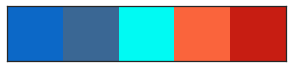

In [21]:
import matplotlib.pyplot as plt
import matplotlib.dates as mtd
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
colors=['#0C68C7','#3A6794','#00FAF3','#FA643C','#C71D12']
sns.set(palette=colors, style='white')

sns.palplot(colors)

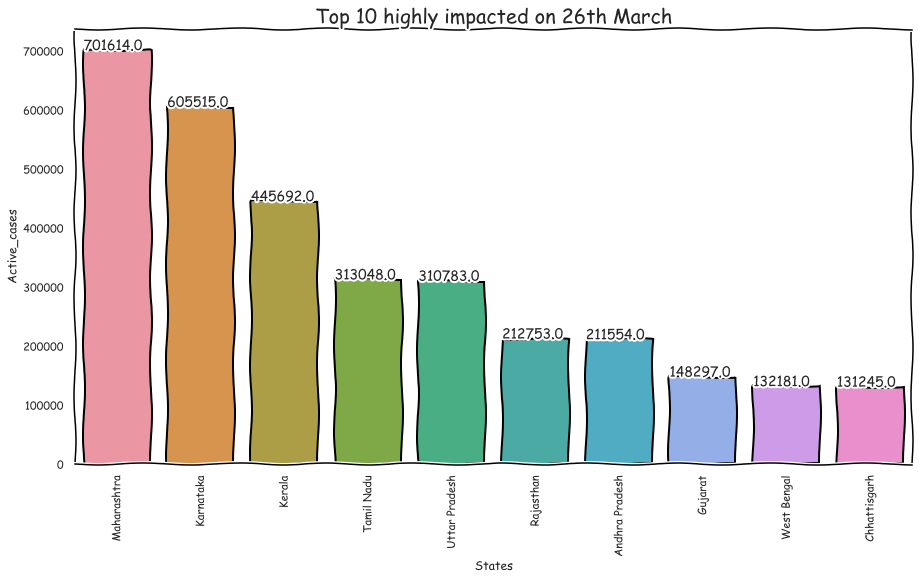

In [22]:
top_10=df.groupby(by='States').max()[['Active_cases','Date']].sort_values(by=['Active_cases'],ascending=False).reset_index()
with plt.xkcd():
    fig=plt.figure(figsize=(15,8))
    plt.title("Top 10 highly impacted on 26th March", size=20)
    ax=sns.barplot(data=top_10.iloc[:10],y='Active_cases',x='States', linewidth=2, edgecolor='black')
    ax.set_xticklabels(labels=ax.get_xticklabels(),rotation=90)
    for i in ax.patches:
        ax.text(x=i.get_x(),y=i.get_height(),s=i.get_height())

As on March 26th Data, Maharastra has highest number active cases and comes the Karnataka, Kerala, Uttar Pradesh & Rajestan

In [23]:
df.head()

Sno       Date  States ConfirmedIndianNational ConfirmedForeignNational  \
0    1 2020-01-30  Kerala                       1                        0   
1    2 2020-01-31  Kerala                       1                        0   
2    3 2020-02-01  Kerala                       2                        0   
3    4 2020-02-02  Kerala                       3                        0   
4    5 2020-02-03  Kerala                       3                        0   

   Cured  Deaths  Confirmed  Active_cases  
0      0       0          1             1  
1      0       0          1             1  
2      0       0          2             2  
3      0       0          3             3  
4      0       0          3             3

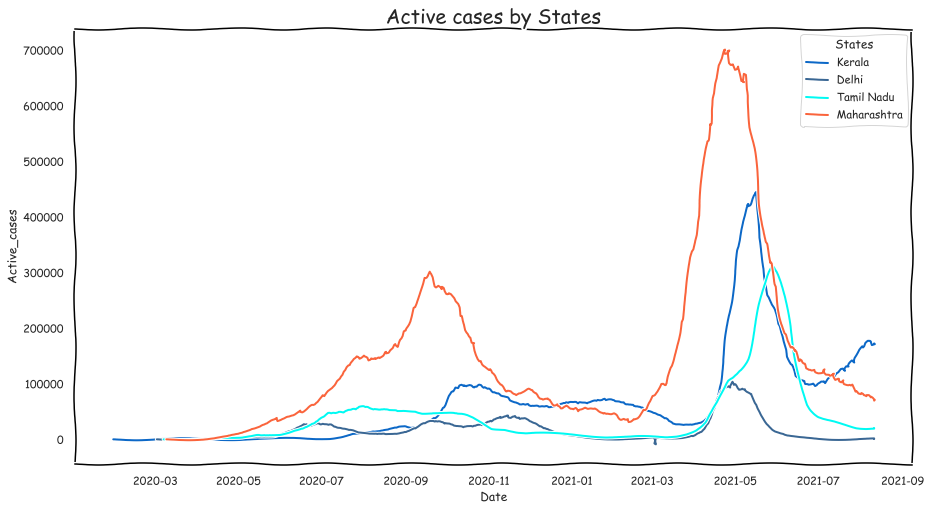

In [24]:
fig=plt.figure(figsize=(15,8))
with plt.xkcd():
    ax=sns.lineplot(data=df[df['States'].isin(['Kerala','Tamil Nadu','Delhi','Maharashtra'])],x='Date',y='Active_cases',hue='States')
    ax.set_title("Active cases by States", size=20)

IndexError: index 40 is out of bounds for axis 0 with size 40

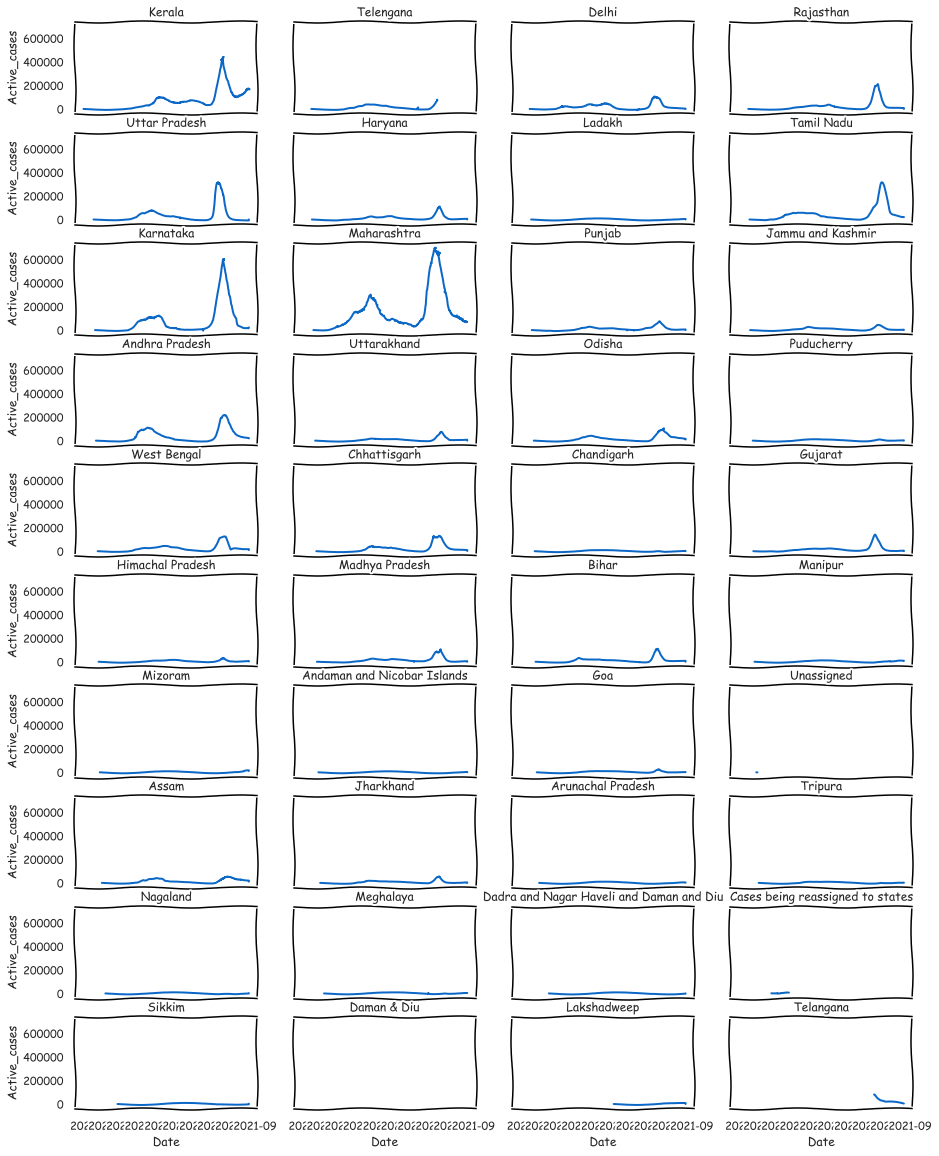

In [25]:
with plt.xkcd():
    fig, ax=plt.subplots(nrows=10, ncols=4, figsize=[15,20], sharex=True, sharey=True)
    ax=ax.flatten()

    for i,s in enumerate(df['States'].unique()):
        data1=df[df['States']==s][['Date','Active_cases']]
        sns.lineplot(data=data1, x='Date',y='Active_cases', ax=ax[i])
        ax[i].set_title(s)

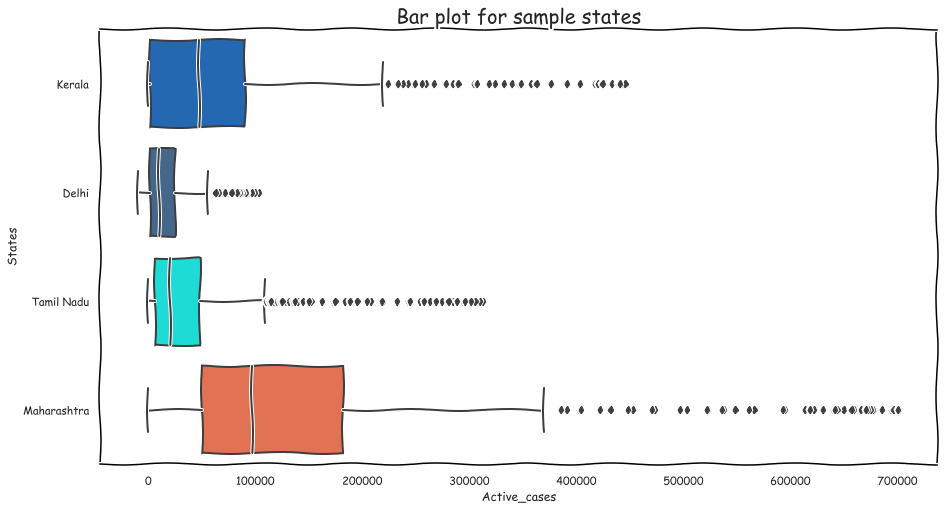

In [26]:
with plt.xkcd():
    fig=plt.figure(figsize=(15,8))
    sns.boxplot(data=df[df['States'].isin(['Kerala','Tamil Nadu','Delhi','Maharashtra'])],x='Active_cases',y='States')
    plt.title("Bar plot for sample states" ,size=20)


In [27]:
median_states=df[df['States'].isin(['Kerala','Tamil Nadu','Delhi','Maharashtra'])]
median_states.groupby(by=['States']).median().style.bar(['Active_cases'])

### Observation:

1.Maharastra - Most of the times Active cases stays between 50000, 190000 range and the range went upto 35000+. mdeian is around 83K cases


2.Kerala - Active cases ranging from 0 to less than 100000. Median is around 40. median value is around 24K

3.Tamilnadu - Avtive cases in Tamilnadu ranging less than 50,000. Median is around 12K

is it because of high rate for cure/deaths?. lets check the same

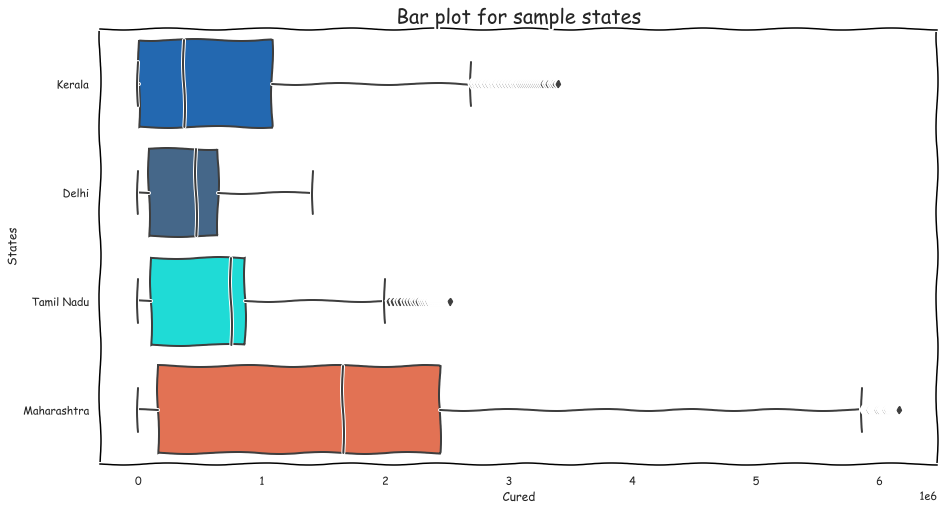

In [28]:
with plt.xkcd():
    fig=plt.figure(figsize=(15,8))
    sns.boxplot(data=df[df['States'].isin(['Kerala','Tamil Nadu','Delhi','Maharashtra'])],x='Cured',y='States')
    plt.title("Bar plot for sample states" ,size=20)

In [29]:
median_states.groupby(by=['States']).median().style.bar(['Cured'])

### Observation:

1.Maharastra - has high range of cured value as well.

2.Kerala - is in 3rd place for cured count 

3.Tamilnadu - is in 2nd place in the sample in terms of cure.
but, we can't conclude the rate by count. we will do some testing

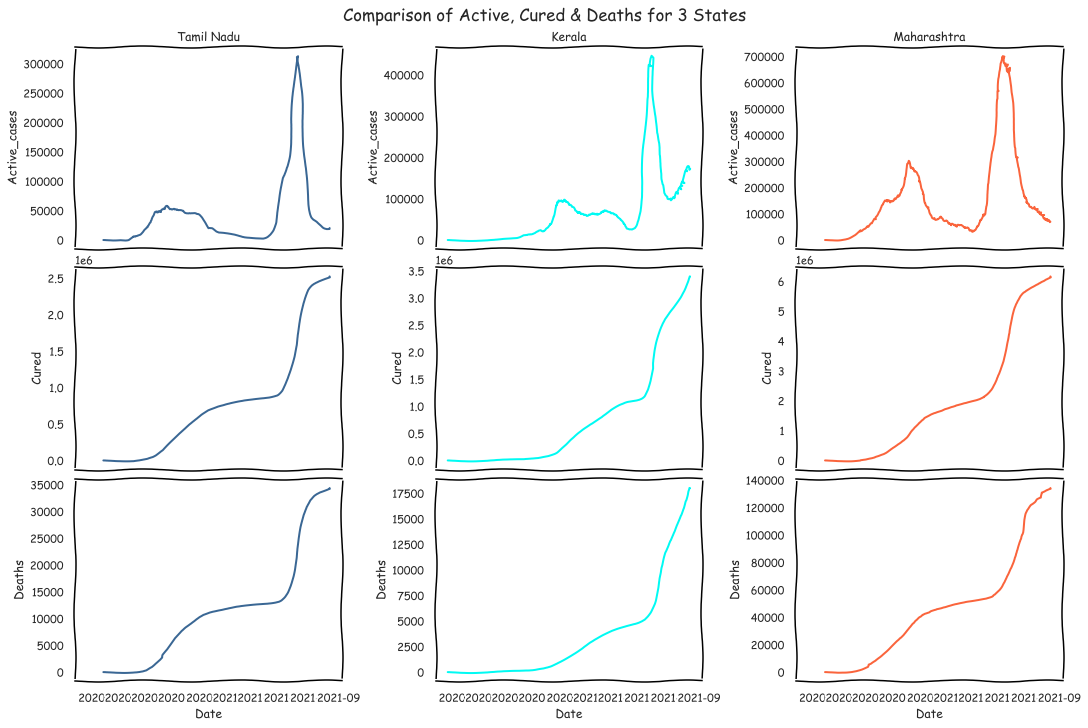

In [30]:
states=['Kerala', 'Tamil Nadu', 'Maharashtra']
tn=df[df['States']=='Tamil Nadu']
kl=df[df['States']=='Kerala']
mh=df[df['States']=='Maharashtra']

with plt.xkcd():

    fig, ax=plt.subplots(nrows=3, ncols=3, figsize=(15,10), squeeze=False, sharex=True, sharey=False, constrained_layout=True )
    plt.suptitle("Comparison of Active, Cured & Deaths for 3 States")
    sns.lineplot(data=tn, x='Date',y='Active_cases', ax=ax[0,0], color=colors[1])
    ax[0,0].set_title("Tamil Nadu")
    sns.lineplot(data=tn, x='Date',y='Cured', ax=ax[1,0], color=colors[1])
    sns.lineplot(data=tn, x='Date',y='Deaths', ax=ax[2,0], color=colors[1])

    sns.lineplot(data=kl, x='Date',y='Active_cases', ax=ax[0,1], color=colors[2])
    ax[0,1].set_title("Kerala")
    sns.lineplot(data=kl, x='Date',y='Cured', ax=ax[1,1], color=colors[2])
    sns.lineplot(data=kl, x='Date',y='Deaths', ax=ax[2,1], color=colors[2])

    sns.lineplot(data=mh, x='Date',y='Active_cases', ax=ax[0,2], color=colors[3])
    ax[0,2].set_title("Maharashtra")
    sns.lineplot(data=mh, x='Date',y='Cured', ax=ax[1,2], color=colors[3])
    sns.lineplot(data=mh, x='Date',y='Deaths', ax=ax[2,2], color=colors[3])

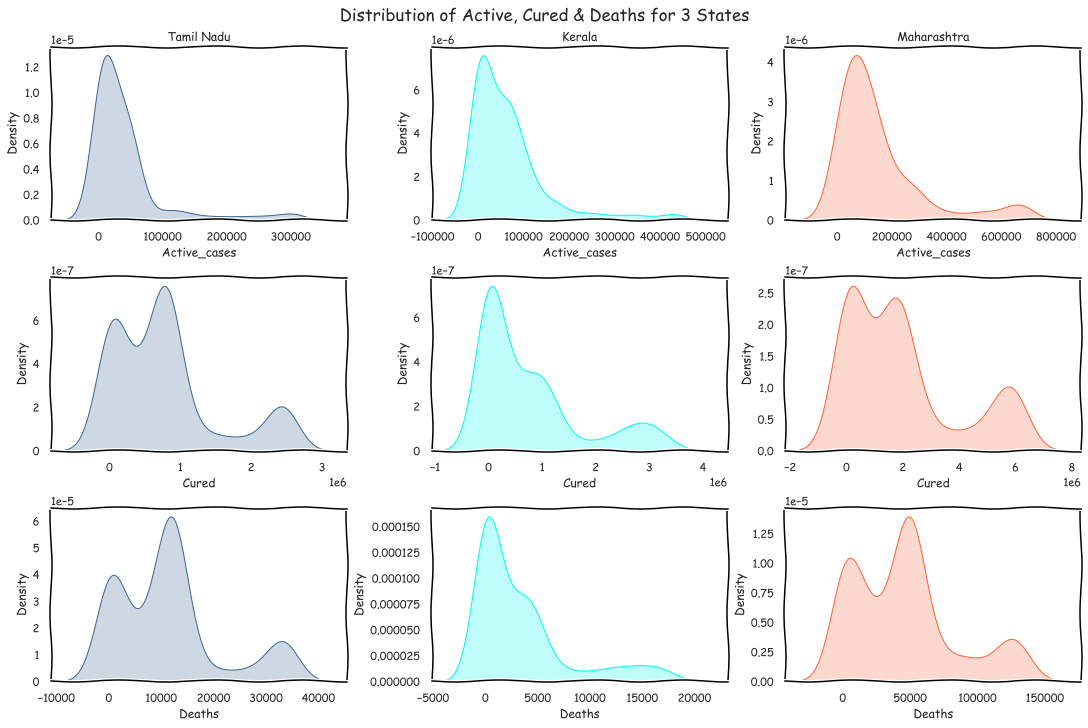

In [31]:
states=['Kerala', 'Tamil Nadu', 'Maharashtra']
tn=df[df['States']=='Tamil Nadu']
kl=df[df['States']=='Kerala']
mh=df[df['States']=='Maharashtra']

with plt.xkcd():

    fig, ax=plt.subplots(nrows=3, ncols=3, figsize=(15,10), squeeze=False, sharex=False, sharey=False, constrained_layout=True )
    plt.suptitle("Distribution of Active, Cured & Deaths for 3 States")
    sns.kdeplot(data=tn['Active_cases'],ax=ax[0,0],color=colors[1], fill=True)
    ax[0,0].set_title("Tamil Nadu")
    sns.kdeplot(data=tn['Cured'],  ax=ax[1,0],color=colors[1],fill=True)
    sns.kdeplot(data=tn['Deaths'], ax=ax[2,0], color=colors[1],fill=True)

    sns.kdeplot(data=kl['Active_cases'], ax=ax[0,1], color=colors[2],fill=True)
    ax[0,1].set_title("Kerala")
    sns.kdeplot(data=kl['Cured'], ax=ax[1,1], color=colors[2],fill=True)
    sns.kdeplot(data=kl['Deaths'], ax=ax[2,1], color=colors[2],fill=True)

    sns.kdeplot(data=mh['Active_cases'], ax=ax[0,2], color=colors[3],fill=True)
    ax[0,2].set_title("Maharashtra")
    sns.kdeplot(data=mh['Cured'], ax=ax[1,2], color=colors[3],fill=True)
    sns.kdeplot(data=mh['Deaths'], ax=ax[2,2], color=colors[3],fill=True)

### Covid-19 Trend Analysis

#### Number of daily Cases

In [32]:
import matplotlib
from matplotlib import cm
import plotly.express as px
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.graph_objects as go

In [33]:
df = pd.read_csv('covid_19_india.csv', parse_dates=['Date'], dayfirst=True)


tests = pd.read_csv('StatewiseTestingDetails.csv' )
#keeping only required columns
df = df[['Date', 'State/UnionTerritory','Cured','Deaths','Confirmed']]
#renaming column names
df.columns = ['date', 'state','cured','deaths','confirmed']

In [34]:
df2 = df.groupby(['date'])['confirmed', 'deaths','cured',].sum().reset_index()

In [35]:
#making columns for daily new cases
df2['new_confirmed'] = df2.confirmed.diff()
df2['new_deaths'] = df2.deaths.diff()
df2['new_cured'] = df2.cured.diff()


#taking dates from 26th March
df2 = df2.iloc[44:]

### Daily New Cases 

In [37]:
fig = go.Figure(go.Bar(x= df2.date, y= df2.new_cured, name='Daily Recovered'))
fig.add_trace(go.Bar(x=df2.date, y= df2.new_deaths, name='Daily Deaths'))
fig.add_trace(go.Bar(x=df2.date, y= df2.new_confirmed, name='Daily Confirmed'))
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.add_annotation(
            x= "2020-03-26",
            y=23000,
           text="",showarrow= False,font=dict(
            family="Courier New, monospace",
            size=12,
            color="teal"
            ),
        align="center",)
fig.add_annotation(
            x= "2020-03-26",
            y=23000,
            text="",showarrow= False,font=dict(
            family="Courier New, monospace",
            size=12,
            color="teal"
            ),
        align="center",)
fig.add_annotation(
            x="2020-03-26",
            y=23000,
           text="",showarrow= False,font=dict(
            family="Courier New, monospace",
            size=12,
            color="teal"
            ),
        align="center",)
fig.add_annotation(
            x= "2020-03-26",
            y=23000,
            text="",showarrow= False,font=dict(
            family="Courier New, monospace",
            size=12,
            color="teal"
            ),
        align="center",)

fig.update_layout(barmode='stack', 
                  xaxis={'categoryorder':'total descending'},
                 title_text='<b>Daily Cases (since 26 March)<b>',
                  title_x=0.5,legend_orientation="h",legend=dict(x= 0.3, y=1.1),
                 paper_bgcolor='white',
                 plot_bgcolor = "white",
                  shapes=[
        
        dict(
            type="rect",
        
            xref="x",
         
            yref="paper",
            x0="2020-03-26",
            y0=0,
            x1="2020-04-14",
            y1=1,
            fillcolor="green",
            opacity=0.3,
            layer="below",
            line_width=2,
        ),
        
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0="2020-04-14",
            y0=0,
            x1="2020-04-30",
            y1=1,
            fillcolor="Lightgreen",
            opacity=0.3,
            layer="below",
            line_width=2,
        ),
       
        
        
    ]
)
fig.show()


In [38]:
import plotly.graph_objects as go


fig = go.Figure([go.Bar(x= df2.date, y= df2.new_confirmed,marker_color='brown')])
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))

fig.add_annotation(
            x= "2020-03-26",
            y=12500,
           text="<b>Lockdown 1<b>",showarrow= False,font=dict(
            family="Courier New, monospace",
            size=12,
            color="teal"
            ),
        align="center",)
fig.add_annotation(
            x= "2020-04-03",
            y=12500,
            text="<b>Lockdown 2<b>",showarrow= False,font=dict(
            family="Courier New, monospace",
            size=12,
            color="teal"
            ),
        align="center",)
fig.add_annotation(
            x="2020-04-10",
            y=12500,
           text="<b>Lockdown 3<b>",showarrow= False,font=dict(
            family="Courier New, monospace",
            size=12,
            color="teal"
            ),
        align="center",)
fig.add_annotation(
            x= "2020-04-24",
            y=12500,
            text="<b>Lockdown 4<b>",showarrow= False,font=dict(
            family="Courier New, monospace",
            size=12,
            color="teal"
            ),
        align="center",)

fig.update_layout(
    title_text='<b>Daily New Confirmed Cases <b>',
                  title_x=0.5,
                 paper_bgcolor='white',
                 plot_bgcolor = "white",
    shapes=[
        
        dict(
            type="rect",
            # x-reference is assigned to the x-values
            xref="x",
            # y-reference is assigned to the plot paper [0,1]
            yref="paper",
            x0="2020-03-26",
            y0=0,
            x1="2020-04-14",
            y1=1,
            fillcolor="green",
            opacity=0.5,
            layer="below",
            line_width=2,
        ),
        
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0="2020-04-14",
            y0=0,
            x1="2020-04-24",
            y1=1,
            fillcolor="lightgreen",
            opacity=0.5,
            layer="below",
            line_width=2,
        ),
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0="2020-04-24",
            y0=0,
            x1="2020-04-30",
            y1=1,
            fillcolor="brown",
            opacity=0.5,
            layer="below",
            line_width=2,
        ),
       
        
    ]
)

fig.show()


Here the shaded rectangles represent the lockdown period.

1st Lockdown: 26th March - 14th April(21 Days)

2nd Lockdown: 14th April - 30th April(16 days)

In [39]:
import plotly.graph_objects as go


fig = go.Figure([go.Bar(x= df2.date, y= df2.new_deaths,marker_color='red')])
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))


fig.update_layout(
    title_text='<b>Daily New Deaths (since 26th March)<b>',
                  title_x=0.5,
                 paper_bgcolor='white',
                 plot_bgcolor = "white",
    shapes=[
        
        dict(
            type="rect",
            # x-reference is assigned to the x-values
            xref="x",
            # y-reference is assigned to the plot paper [0,1]
            yref="paper",
            x0="2020-03-26",
            y0=0,
            x1="2020-04-14",
            y1=1,
            fillcolor="green",
            opacity=0.3,
            layer="below",
            line_width=2,
        ),
        
        
    
        
        
        
    ]
)

fig.show()

In [40]:
fig = go.Figure([go.Bar(x= df2.date, y= df2.new_cured,marker_color='green')])
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))

fig.update_layout(
    title_text='<b>Daily New Recovered Cases (since 26 March)<b>',
                  title_x=0.5,
                 paper_bgcolor='white',
                 plot_bgcolor = "white",
    shapes=[
        
        dict(
            type="rect",
            # x-reference is assigned to the x-values
            xref="x",
            # y-reference is assigned to the plot paper [0,1]
            yref="paper",
            x0="2020-03-26",
            y0=0,
            x1="2020-04-30",
            y1=1,
            fillcolor="green",
            opacity=0.5,
            layer="below",
            line_width=2,
        ),
        
       
        
        
    ]
)

fig.show()

### Statewise Analysis

In [41]:
df['new_confirmed'] = df.groupby(['state'])['confirmed'].diff()
df['new_deaths'] = df.groupby(['state'])['deaths'].diff()
df['new_cured'] = df.groupby(['state'])['cured'].diff()


In [42]:
import plotly.express as px


fig = px.line(df, x="date", y="confirmed", color='state',template= "plotly_white")
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_traces(mode='lines + markers')
fig.update_layout(legend_orientation="h",legend=dict(x= -.1, y=-.3),
                  autosize=False,
                  width= 750,
                  height= 850,
                  title_text='<b>Confirmed Cases of Covid-19 in India<b> ',
                  title_x=0.5,
                 paper_bgcolor='snow',
                 plot_bgcolor = "snow")
fig.show()

In [43]:
import plotly.express as px


fig = px.line(df, x="date", y="deaths", color='state',template= "plotly_white")
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_traces(mode='lines + markers')
fig.update_layout(legend_orientation="h",legend=dict(x= -.1, y=-.2),
                  autosize=False,
                  width= 750,
                  height= 850,
                  title_text='<b>Deaths due to Covid-19 in India<b>',
                  title_x=0.5,
                 paper_bgcolor='snow',
                 plot_bgcolor = "snow")
fig.show()

In [44]:
import plotly.express as px


fig = px.line(df, x="date", y="cured", color='state',template= "plotly_white")
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_traces(mode='lines + markers')
fig.update_layout(legend_orientation="h",legend=dict(x= -.1, y=-.2),
                  autosize=False,
                  width= 750,
                  height= 850,
                  title_text='<b>Recovered cases of Covid-19 in India<b>',
                  title_x=0.5,
                 paper_bgcolor='snow',
                 plot_bgcolor = "snow")
fig.show()

In [45]:
states = ['Maharashtra', 'Delhi', 'Tamil Nadu', 'Gujarat', 'Uttar Pradesh',
       'Rajasthan', 'West Bengal', 'Madhya Pradesh', 'Haryana',
       'Andhra Pradesh']



higha = df[df.state.isin(states)]

In [46]:
df = df[df.new_confirmed > 0]
import plotly.express as px


fig = px.line(higha, x="date", y="new_confirmed", color='state',template= "plotly_white")
fig.update_traces(mode='lines +markers')
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_layout(legend=dict(x= 0.05, y= 1),
    title_text='<b>Daily New Confirmed Cases of Covid-19<b> ',
                  title_x=0.5,
                 paper_bgcolor='white',
                 plot_bgcolor = "white",
    shapes=[
        dict(
            type="rect",
            
            xref="x",
            
            yref="paper",
            x0="2020-03-26",
            y0=0,
            x1="2020-04-30",
            y1=1,
            fillcolor="green",
            opacity=0.5,
            layer="below",
            line_width=2,
        ),
        
      
        
        
        
    ]
)
fig.show()

In [47]:
df = df[df.new_deaths > 0]
import plotly.express as px


fig = px.line(higha, x="date", y="new_deaths", color='state',template= "plotly_white")
fig.update_traces(mode='lines+markers')
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_layout(legend=dict(x= 0.05, y= 1),
    title_text='<b>Daily New Deaths due to Covid-19<b>',
                  title_x=0.5,
                 
    shapes=[
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0="2020-03-26",
            y0=0,
            x1="2020-04-30",
            y1=1,
            fillcolor="green",
            opacity=0.5,
            layer="below",
            line_width=2,
        ),
        
        
         
        
        
        
    ]
)
fig.show()